In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D

In [16]:
data=pd.read_csv('expenses.csv')

In [17]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data_stat=data.describe()
data_stat

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='charges', ylabel='sex'>

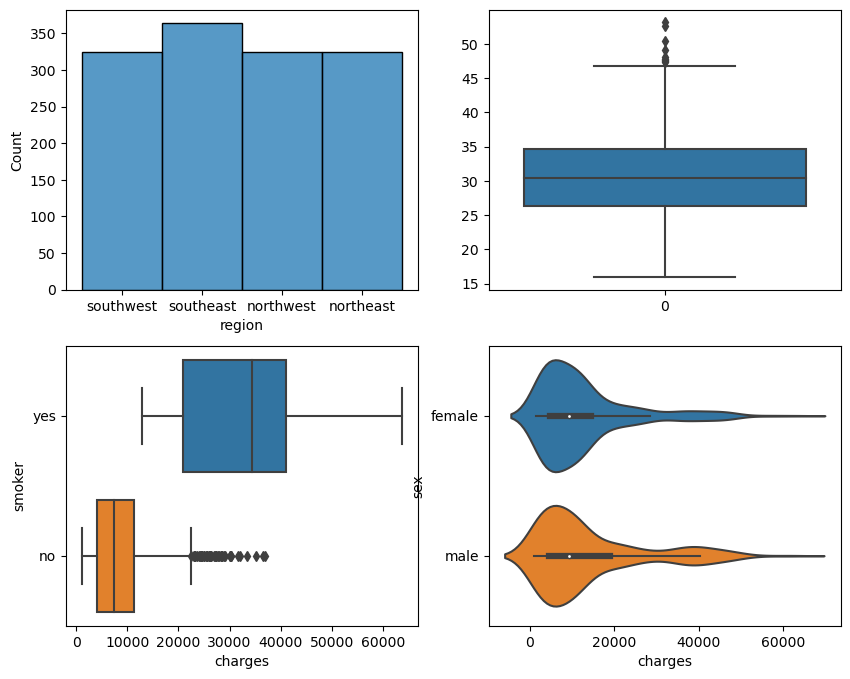

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(x=data['region'])
plt.subplot(2,2,2)
sns.boxplot(data['bmi'])                                 
plt.subplot(2,2,3)
sns.boxplot(x=data['charges'],y=data['smoker'])
plt.subplot(2,2,4)
sns.violinplot(x=data['charges'],y=data['sex'])


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
print('Correlation between fixed acidity and quality is',data['quality'].corr(data['fixed acidity']))
print('Skewness of the fixed column is',data['fixed acidity'].skew())

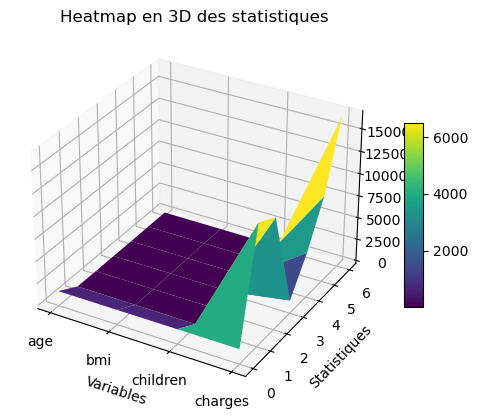

In [23]:

data_stat = {
    'age': [1338, 39.207025, 14.049960, 18, 27, 40, 54],
    'bmi': [1338, 30.663397, 6.098187, 15.96, 26.29625, 30.4, 34.69375],
    'children': [1338, 1.094918, 1.205493, 0, 0, 1, 2],
    'charges': [1338, 13270.422265, 12110.011237, 1121.8739, 4740.28715, 9382.033, 16639.912515]
}
data_stat = pd.DataFrame(data_stat)
variables = data_stat.columns
x = np.arange(len(variables))
y = np.arange(len(data_stat))
X, Y = np.meshgrid(x, y)
Z = data_stat.to_numpy()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xticks(x)
ax.set_xticklabels(variables)
ax.set_yticks(y)
ax.set_yticklabels(data_stat.index)
ax.set_xlabel("Variables")
ax.set_ylabel("Statistiques")
ax.set_zlabel("Valeurs")
ax.set_title("Heatmap en 3D des statistiques")
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

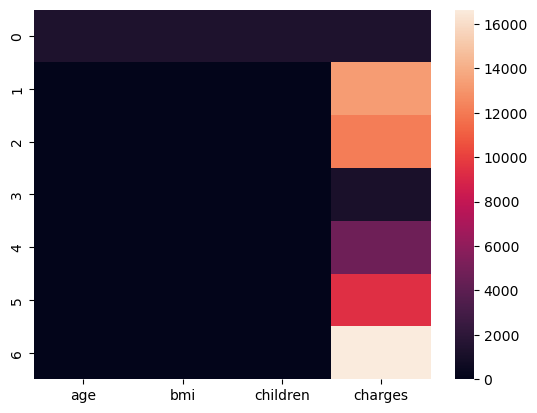

In [24]:
sns.heatmap(data_stat)
plt.show()

### Court des charges par genre 

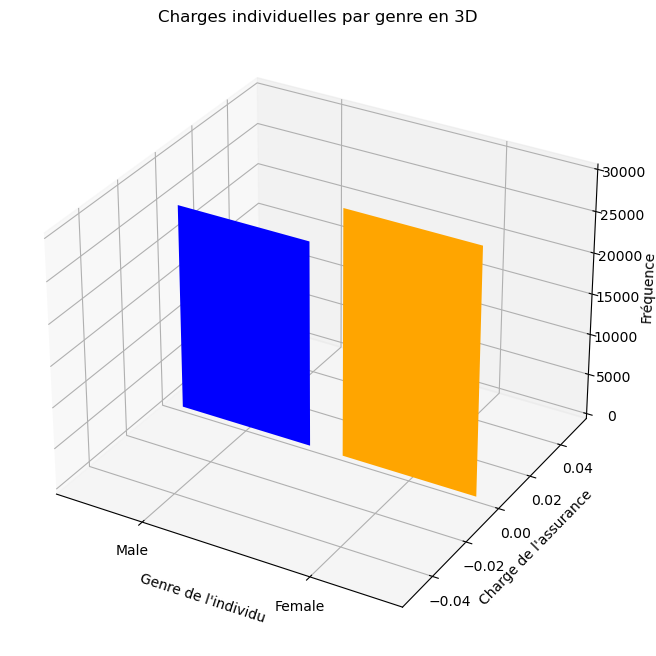

In [27]:
data = {
    'sex': ['Male', 'Female'],
    'charges': [25000, 30000]
}
import pandas as pd
data = pd.DataFrame(data)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
x = data['sex']
y = data['charges']
z = [0, 0]
ax.bar(x, y, z, zdir='y', color=['blue', 'orange'])
ax.set_xlabel("Genre de l'individu")
ax.set_ylabel("Charge de l'assurance")
ax.set_zlabel("Fréquence")
ax.set_title("Charges individuelles par genre en 3D")

plt.show()


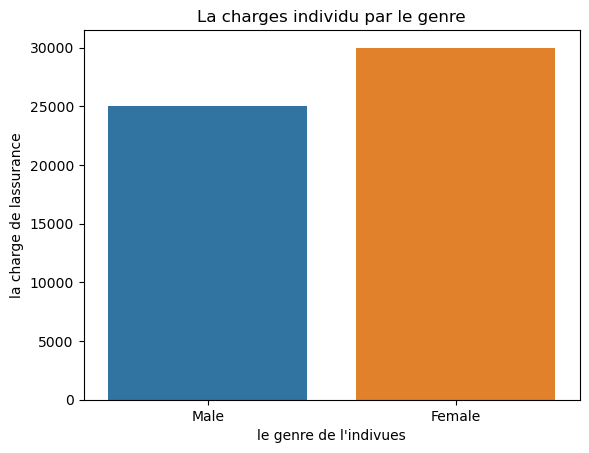

In [26]:
sns.barplot(x='sex',y='charges',data=data)
plt.xlabel("le genre de l'indivues")
plt.ylabel("la charge de lassurance")
plt.title('La charges individu par le genre')
plt.show()

In [30]:
data

,sex,charges
0,Male,25000
1,Female,30000


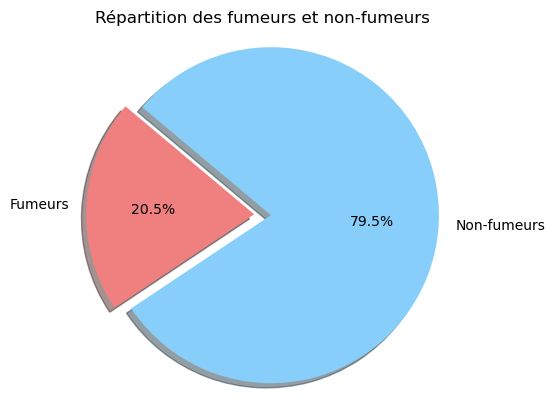

In [33]:

smoker_data = data[data['smoker'] == 'yes']
num_smokers = len(smoker_data)
num_non_smokers = len(data) - num_smokers
labels = ['Fumeurs', 'Non-fumeurs']
sizes = [num_smokers, num_non_smokers]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # Explosion du premier secteur (fumeurs)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Assure que le graphique en secteurs est circulaire
plt.title("Répartition des fumeurs et non-fumeurs")
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoders={}
for colunm in data:
    le=LabelEncoder()
    data[colunm]=le.fit_transform(data[colunm])
    label_encoders[colunm]=le


In [28]:
data

,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,1005
1,0,1,350,1,0,2,57
2,10,1,331,3,0,2,306
3,15,1,73,0,0,1,1097
4,14,1,223,0,0,1,254
...,...,...,...,...,...,...,...
1333,32,1,276,3,0,1,746
1334,0,0,302,0,0,0,118
1335,0,0,422,0,0,2,32
1336,3,0,146,0,0,3,91


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import _scorer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression

In [30]:
X=data.drop('charges',axis=1)
y=data["charges"]

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
from sklearn.metrics import accuracy_score, roc_curve, auc

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train, y_train)
y_predic=clf.predict(X_train)
r2_s=r2_score(y_train,y_predic)
accuracy = accuracy_score(y_train,y_predic)


In [36]:

print("Accuracy :", accuracy)
print("r2 :", r2_s)


Accuracy : 0.9981308411214953
r2 : 0.9886374649513909
